[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Luettmer_homogeneous_freezing/fig_S1_S2.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Luettmer_homogeneous_freezing/fig_S1_S2.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Luettmer_homogeneous_freezing/fig_S1_S2.ipynb)

Supplement Fig. 1 and 2

In [ ]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

standard_sig = hom_pure_droplet_freezing_standard_setup()
standard_sig["type_droplet_distribution"] = "lognormal"
standard_sig["sigma_droplet_distribution"] = 2.0
standard_sig["r_ccn"] =  0.05e-6
standard_sig["n_sd"] =  int(1e4)


In [3]:
# High output step reference simulations
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 5.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_KoopMurray2016_simulation = run_simulations(setting_dict)
setting_dict = {
            **standard,
            "backend": backends["Spichtinger2023"],
            "hom_freezing": "Spichtinger2023",
            "w_updraft": 5.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_Spichtinger2023_simulation = run_simulations(setting_dict)

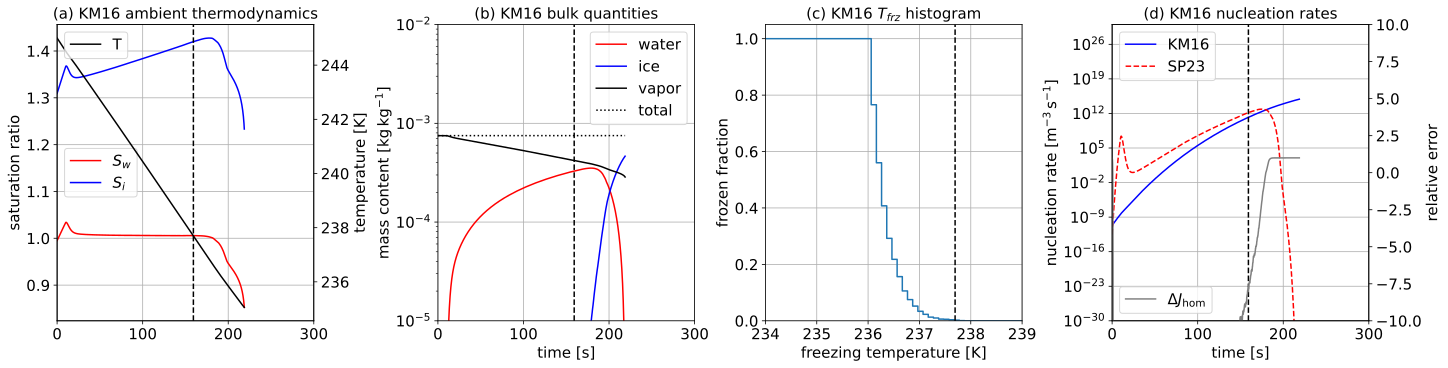

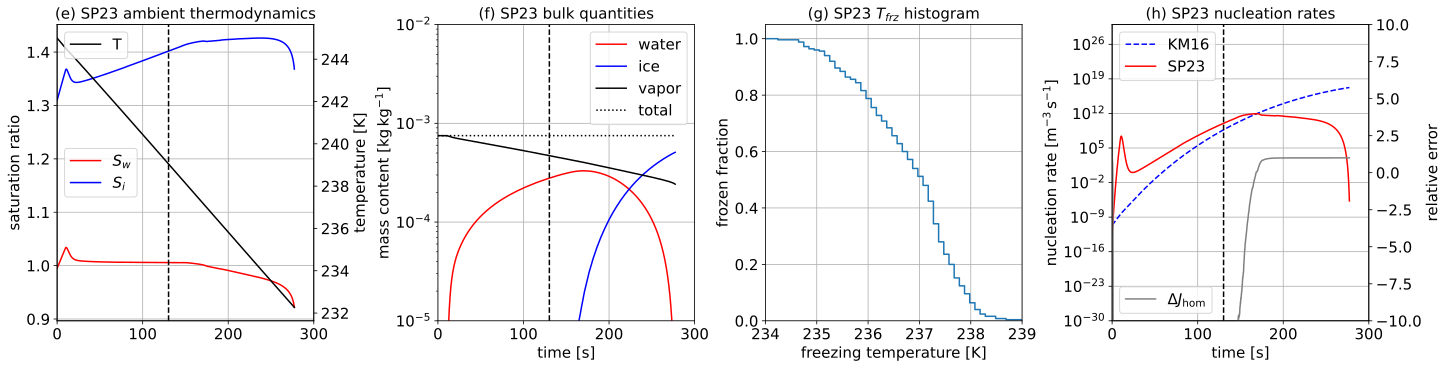

In [4]:
panel_labels = ["(a)", "(b)", "(c)", "(d)"]
frz_label = " KM16 "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_dep_KoopMurray2016_simulation, title_add=panel_labels, t_lim=300.)
show_plot("fig_sup_11")

panel_labels = ["(e)", "(f)", "(g)", "(h)"]
frz_label = " SP23 "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_dep_Spichtinger2023_simulation, title_add=panel_labels, t_lim=300.)
show_plot("fig_sup_12")

In [5]:
# High output step reference simulations
setting_dict = {
            **standard_sig,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 2.5,
            "n_output": 1,
            "silent": False,
            "deposition_enable": False,
            "n_sd": 10000,
            "sigma_droplet_distribution": 2.0,
            "r_ccn": 50.e-9,
            }
reference_high_sig20_simulation = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=2.5 and N_sd=10000 and n_ccn=749999999.9999999
Starting simulation...
all particles frozen or evaporated


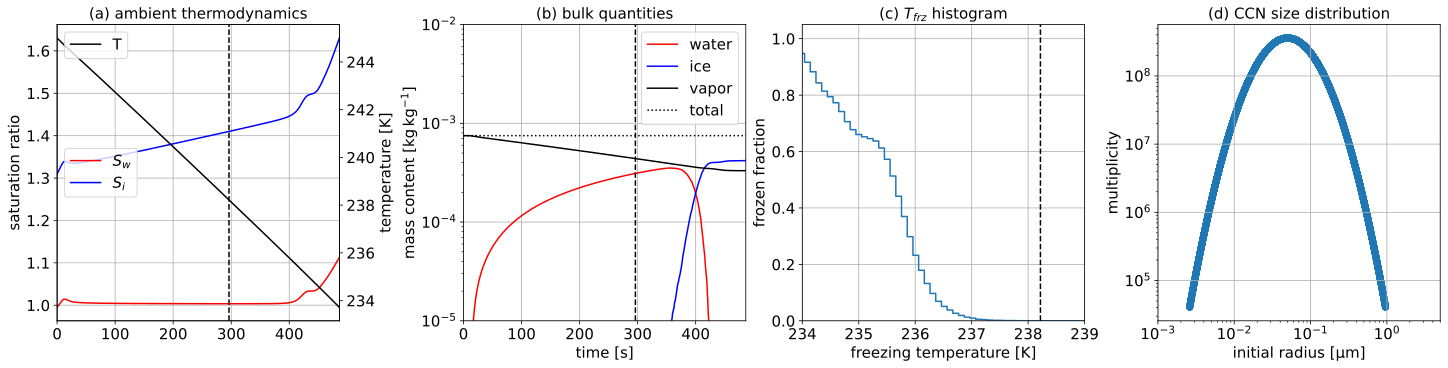

In [6]:
panel_labels = ["(a)", "(b)", "(c)", "(d)"]
frz_label = " "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_sig20_simulation, title_add=panel_labels, show_jhom=False, show_tf=True)
show_plot("fig_sup_2")